# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [189]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_combined = pd.merge(study_results, mouse_metadata)
# Display the data table for preview
study_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [18]:
# Checking the number of mice.
mice = study_combined.groupby(['Mouse ID']).count()
mice.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7


In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_by_ID = study_combined[study_combined.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
mice_by_ID.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_combined_clean = study_combined.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
study_combined_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [39]:
# Checking the number of mice in the clean DataFrame.
clean_mice = study_combined_clean.groupby(['Mouse ID']).count()
clean_mice

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume = study_combined_clean[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
tumor_volume.head()
summary_stat = tumor_volume.groupby(['Drug Regimen']).describe()
summary_stat
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = tumor_volume.groupby(['Drug Regimen']).mean()
tumor_median = tumor_volume.groupby(['Drug Regimen']).median()
tumor_var = tumor_volume.groupby(['Drug Regimen']).var()
tumor_std = tumor_volume.groupby(['Drug Regimen']).std()
tumor_sem = tumor_volume.groupby(['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_sum = pd.DataFrame({
        'Drug Regimen': tumor_volume['Drug Regimen'],
        'Tumor Mean':tumor_mean,
        'Tumor Median': tumor_median,
        'Tumor Varience': tumor_var,
        'Tumor Standard Deviation': tumor_std,
        'Tumor SEM': tumor_sem
        })


In [59]:
# Using the aggregation method, produce the same summary statistics in a single line.
tumor_sum_2 = tumor_volume.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
tumor_sum_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Drug by Timepoint Count'}, xlabel='Drug', ylabel='Count'>

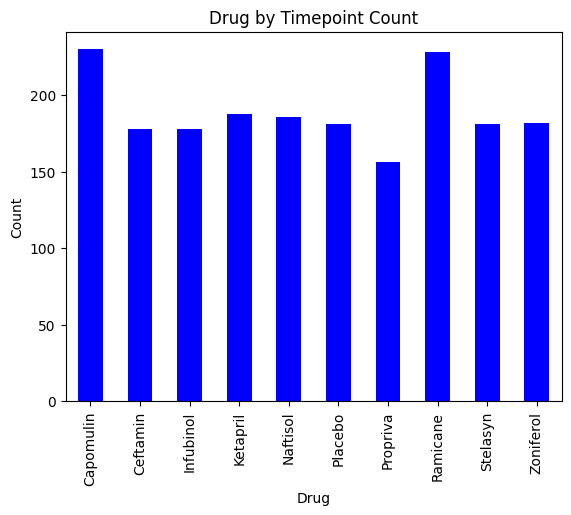

In [109]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_by_time = study_combined_clean.groupby(['Drug Regimen']).count()
drug_by_time = drug_by_time['Timepoint']
drug_by_time
drug_by_time.plot(kind = 'bar', facecolor = 'blue', title = 'Drug by Timepoint Count', xlabel = "Drug", ylabel = 'Count')

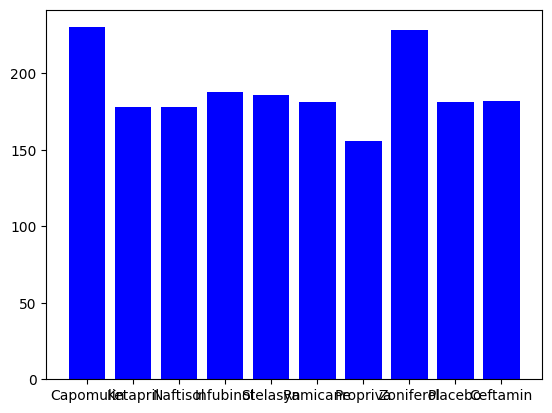

In [99]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_by_time = study_combined_clean.groupby('Drug Regimen').count()
time_count = drug_by_time['Timepoint']
drug_regimens = study_combined_clean['Drug Regimen'].unique()
time_count

bar_chart = plt.bar(drug_regimens, time_count, color = 'b')


<Axes: ylabel='Mouse ID'>

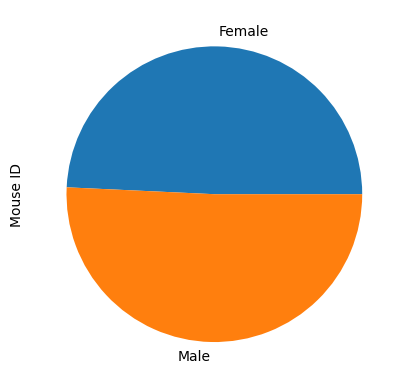

In [114]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mouse = study_combined_clean.groupby(['Sex']).count()
gender_mouse = gender_mouse['Mouse ID']
gender_mouse.plot(kind= "pie")



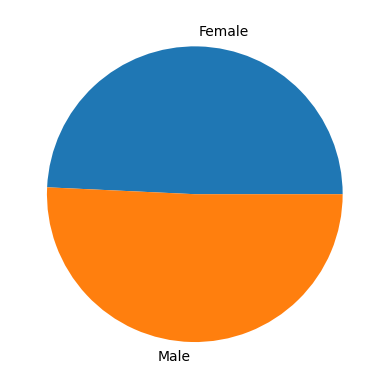

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = study_combined_clean.groupby('Sex').count()
id_count = gender['Mouse ID']
gender_pie = plt.pie(id_count, labels= ['Female', 'Male'])


## Quartiles, Outliers and Boxplots

In [162]:
# Calculate the final tumor volume ofCapomulin, Ramicane, Infubinol, and Ceftamin each mouse across four of the treatment regimens:  
# 

# Start by getting the last (greatest) timepoint for each mouse
last_tumor = study_combined_clean.groupby(['Mouse ID'])['Timepoint'].max()
last_tumor = pd.merge(last_tumor, study_combined_clean, on= 'Timepoint')
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor


,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,45,b128,38.982878,2,Capomulin,Female,9,22
1,45,h246,74.104086,2,Ketapril,Male,13,30
2,45,p189,75.294936,4,Ketapril,Male,8,28
3,45,b559,73.051363,1,Naftisol,Male,20,26
4,45,y260,62.909441,4,Ketapril,Female,7,25
...,...,...,...,...,...,...,...,...
40251,20,t565,39.070214,0,Capomulin,Female,20,17
40252,20,i557,43.967895,0,Capomulin,Female,1,24
40253,20,m957,38.909349,1,Capomulin,Female,3,19
40254,20,f966,30.485985,0,Capomulin,Male,16,17


In [146]:
# Put treatments into a list for loop (and later for plot labels)
drug_regimens

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = last_tumor['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
# Locate the rows which contain mice on each drug and get the tumor volumes
ltv = last_tumor[['Drug Regimen', 'Tumor Volume (mm3)']]
ltv.head()
# add subset 
ltv_sub = ltv.loc[ltv['Drug Regimen'].isin(['Capomulin','Ramicane', 'Infubinol', 'Ceftamin'])]
# Determine outliers using upper and lower bounds
ltv_sub

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,38.982878
14,Infubinol,72.226731
15,Infubinol,67.685569
16,Infubinol,66.196912
17,Infubinol,62.754451
...,...,...
40251,Capomulin,39.070214
40252,Capomulin,43.967895
40253,Capomulin,38.909349
40254,Capomulin,30.485985


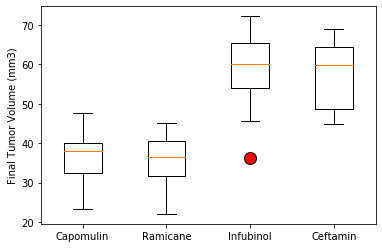

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot = ltv_sub.boxplot()


## Line and Scatter Plots

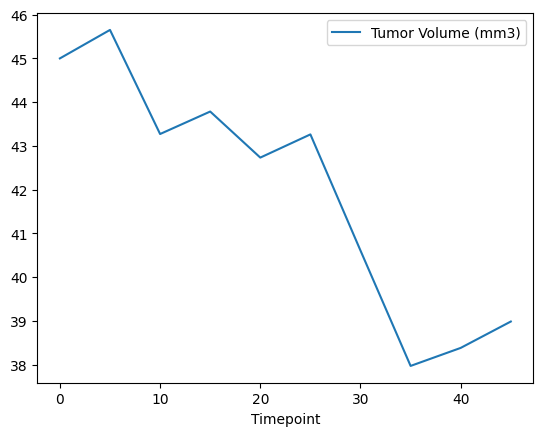

In [178]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = study_combined_clean.loc[study_combined_clean['Drug Regimen'] == 'Capomulin']
mouse_b128 = mouse.loc[mouse['Mouse ID'] == 'b128']
mouse_b128
mouse_plot = mouse_b128.plot(x= 'Timepoint', y= 'Tumor Volume (mm3)')


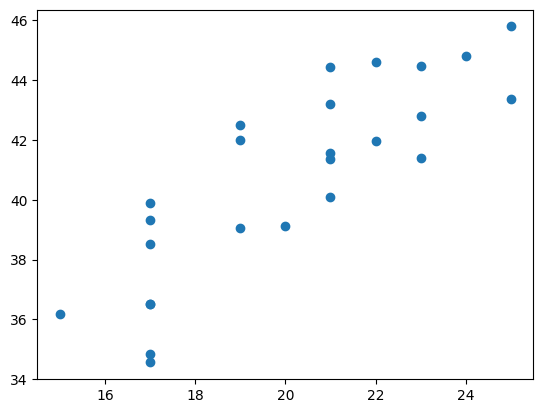

In [183]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_group = study_combined_clean.loc[study_combined_clean['Drug Regimen'] == 'Capomulin']
cap_average_tumor_vol = cap_group.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
cap_average_mouse_weight = cap_group.groupby(['Mouse ID'])['Weight (g)'].mean()
scatter_weight = plt.scatter(cap_average_mouse_weight, cap_average_tumor_vol)

## Correlation and Regression

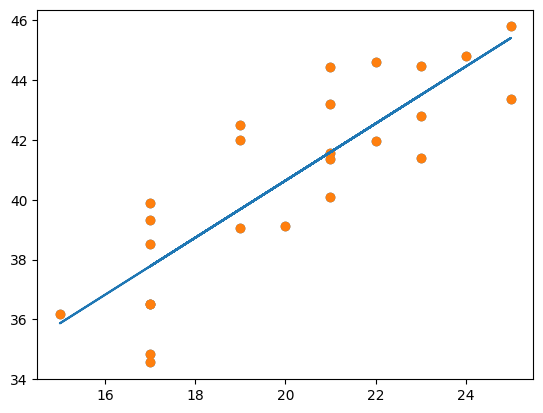

In [191]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(cap_average_mouse_weight, cap_average_tumor_vol)
a, b = np.polyfit(cap_average_mouse_weight, cap_average_tumor_vol, 1)

#add points to plot
plt.scatter(cap_average_mouse_weight, cap_average_tumor_vol)

#add line of best fit to plot
plt.plot(cap_average_mouse_weight, a*cap_average_mouse_weight+b)

plt.show()
